In [1]:
#Importing Libraries
import rasterio
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import geopandas as gpd
from rasterio.features import shapes
from rasterio.mask import mask
import gdal
import osgeo
from shapely.geometry import box
from shapely.geometry import Polygon
import geopandas as gpd
from rasterio.mask import mask
import fiona

### 2021 year

In [2]:
#Composite of images 
def composite_band(input_dir, output_dir):
    path=input_dir
    print(' >>> Composite image generation .... ')
    parent_dir = path.split(path.split(os.sep)[-5])[0]
    #filename
    filename_b4 = glob.glob(os.path.join(input_dir,"*B4.tif"))[0]
    filename_b3 = glob.glob(os.path.join(input_dir,"*B3.tif"))[0]
    filename_b2 = glob.glob(os.path.join(input_dir,"*B2.tif"))[0]
   
#     filename_b4 = glob.glob(os.path.join(input_dir,"*B04.jp2"))[0]
#     filename_b3 = glob.glob(os.path.join(input_dir,"*B03.jp2"))[0]
#     filename_b2 = glob.glob(os.path.join(input_dir,"*B02.jp2"))[0]
   
    bnd_4 = rasterio.open(filename_b4)
    b4 = bnd_4.read(1)
    bnd_3 = rasterio.open(filename_b3)
    b3 = bnd_3.read(1)
    bnd_2 = rasterio.open(filename_b2)
    b2 = bnd_2.read(1)

    band_geo = bnd_4.profile
    band_geo.update({"count": 3})
    
    comp_path = os.path.join(output_dir, path.split(os.sep)[-2]+'_rgb.tiff')
    with rasterio.open(comp_path, 'w', **band_geo) as dest:
    # I rearanged the band order writting to 2→3→4 instead of 4→3→2
        dest.write(bnd_4.read(1),1)
        dest.write(bnd_3.read(1),2)
        dest.write(bnd_2.read(1),3)

    return comp_path

In [3]:
#Composite Image

input_dir = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2021"
output_dir = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res"

composite_band(input_dir, output_dir)

 >>> Composite image generation .... 


'C:\\Deepali_pro\\Covid_19_impact\\urban_growth\\result\\AOI_2_based_res\\landsat\\res\\landsat_rgb.tiff'

In [4]:
"""Image clipping function"""
def clip_img(shapefile, Parent_img_path, clip_img_path):
    # Read Shape file
    with fiona.open(shapefile, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]   
    # read imagery file
    with rasterio.open(Parent_img_path) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta
    # Save clipped imagery
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    with rasterio.open(clip_img_path, "w", **out_meta) as dest:
        dest.write(out_image)        
    return clip_img_path

In [5]:
shapefile = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\aoi\aoi.shp"
# 2021
#SWIR
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2021\LC08_L2SP_122045_20210220_20210303_02_T1_SR_B6.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\swir_2021.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#NIR
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2021\LC08_L2SP_122045_20210220_20210303_02_T1_SR_B5.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\nir_2021.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#RED
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2021\LC08_L2SP_122045_20210220_20210303_02_T1_SR_B4.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\red_2021.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#RGB
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\landsat_rgb_2021.tiff"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\rgb_2021_clip.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)

'C:\\Deepali_pro\\Covid_19_impact\\urban_growth\\result\\AOI_2_based_res\\landsat\\res\\2021\\rgb_2021_clip.tif'

### NDBI :
The Normalized Difference Build-up Index (NDBI)  highlights urban areas with higher reflectance in the shortwave-infrared 
spectral range (SWIR).   
Therefore, the NDBI was computed as follows:


___NDBI=ρSWIR1−ρNIR/ρSWIR1+ρNIR___

In [6]:
#NDBI 

# pre
nir_2021 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\nir_2021.tif")
nir_2021_data = nir_2021.read(1)
swir_2021 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\swir_2021.tif")
swir_2021_data = swir_2021.read(1)
# NBR 
NDBI_2021 = (swir_2021_data.astype('float32') - nir_2021_data.astype('float32'))/(swir_2021_data.astype('float32') + nir_2021_data.astype('float32'))

c:\users\dell\.conda\envs\sar\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


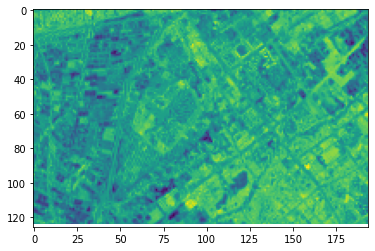

In [7]:
plt.imshow(NDBI_2021)

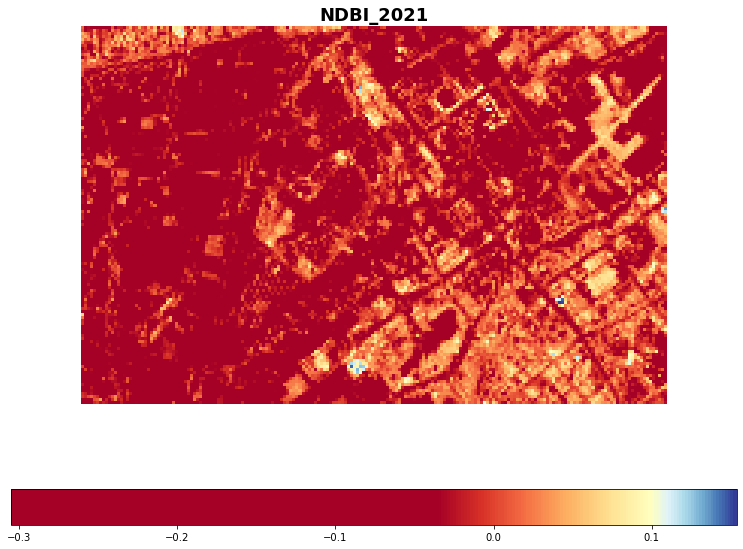

In [8]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(NDBI_2021)
max=np.nanmax(NDBI_2021)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(NDBI_2021, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('NDBI_2021', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

In [9]:
#save image
band_geo = nir_2021.meta

band_geo.update({"count": 1})
band_geo.update({"dtype": 'float32'})
band_geo.update({'driver':'GTiff'})

path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\ndbi_2021.tif"
with rasterio.open(path, 'w', **band_geo) as dest:
    dest.write(NDBI_2021,1)

In [10]:
#NDVI
red_2021 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\red_2021.tif")
red_2021_data = red_2021.read(1)
# NBR 
NDVI_2021 = (nir_2021_data.astype('float32') - red_2021_data.astype('float32'))/(nir_2021_data.astype('float32') + red_2021_data.astype('float32'))

c:\users\dell\.conda\envs\sar\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


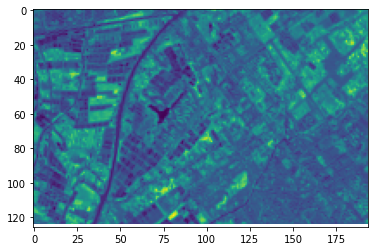

In [11]:
plt.imshow(NDVI_2021)

In [12]:
#save image
band_geo = nir_2021.meta

band_geo.update({"count": 1})
band_geo.update({"dtype": 'float32'})
band_geo.update({'driver':'GTiff'})

path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\ndvi_2021.tif"
with rasterio.open(path, 'w', **band_geo) as dest:
    dest.write(NDVI_2021,1)

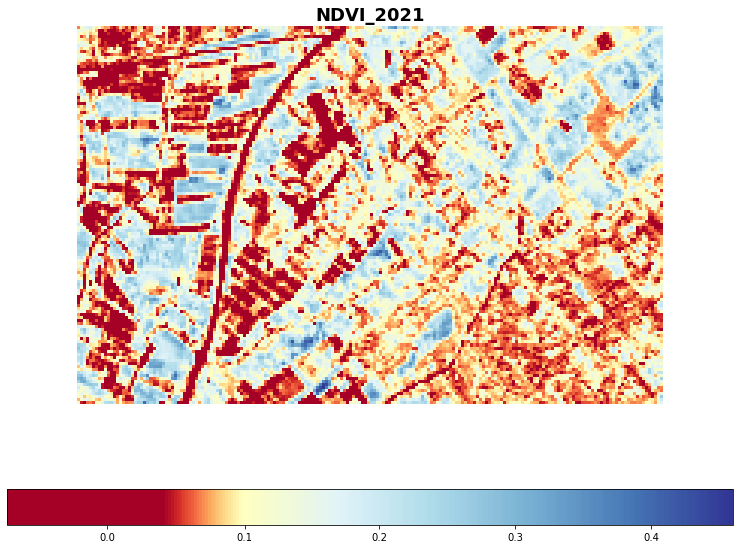

In [13]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(NDVI_2021)
max=np.nanmax(NDVI_2021)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(NDVI_2021, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('NDVI_2021', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

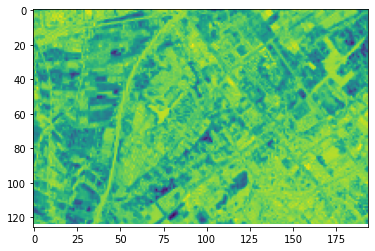

In [14]:
#BU

BU_2021 = NDBI_2021 - NDVI_2021
plt.imshow(BU_2021)

In [15]:
#save image
band_geo = nir_2021.meta

band_geo.update({"count": 1})
band_geo.update({"dtype": 'float32'})
band_geo.update({'driver':'GTiff'})

path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2021\bu_2021.tif"
with rasterio.open(path, 'w', **band_geo) as dest:
    dest.write(BU_2021,1)

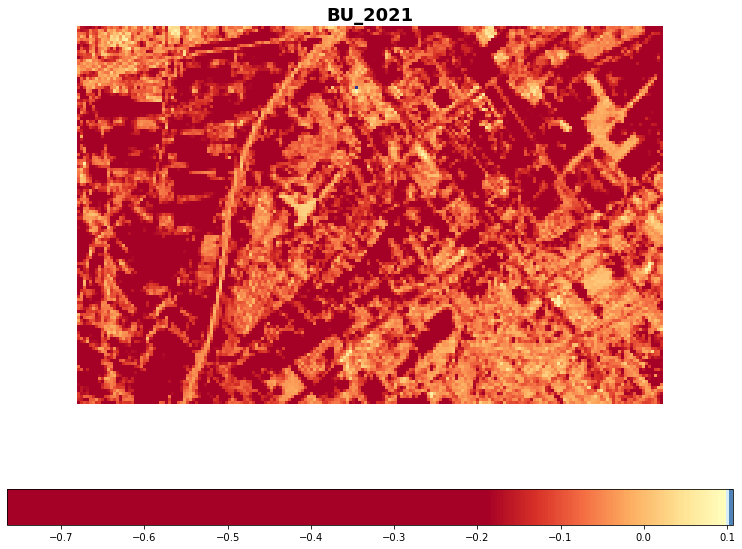

In [16]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(BU_2021)
max=np.nanmax(BU_2021)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(BU_2021, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('BU_2021', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

### Year 2020

In [17]:
#Composite Image

input_dir = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2020"
output_dir = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020"

composite_band(input_dir, output_dir)

 >>> Composite image generation .... 


'C:\\Deepali_pro\\Covid_19_impact\\urban_growth\\result\\AOI_2_based_res\\landsat\\res\\2020\\landsat_rgb.tiff'

In [18]:
shapefile = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\aoi\aoi.shp"
# 2021
#SWIR
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2020\LC08_L2SP_122045_20201202_20210312_02_T1_SR_B6.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\swir_2020.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#NIR
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2020\LC08_L2SP_122045_20201202_20210312_02_T1_SR_B5.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\nir_2020.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#RED
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\2020\LC08_L2SP_122045_20201202_20210312_02_T1_SR_B4.TIF"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\red_2020.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)
#RGB
Parent_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\landsat_rgb.tiff"
clip_img_path = r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\rgb_2021_clip.tif"
clip_img(shapefile, Parent_img_path, clip_img_path)

'C:\\Deepali_pro\\Covid_19_impact\\urban_growth\\result\\AOI_2_based_res\\landsat\\res\\2020\\rgb_2021_clip.tif'

In [19]:
#NDBI 

# pre
nir_2020 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\nir_2020.tif")
nir_2020_data = nir_2020.read(1)
swir_2020 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\swir_2020.tif")
swir_2020_data = swir_2020.read(1)
# NBR 
NDBI_2020 = (swir_2020_data.astype('float32') - nir_2020_data.astype('float32'))/(swir_2020_data.astype('float32') + nir_2020_data.astype('float32'))

c:\users\dell\.conda\envs\sar\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


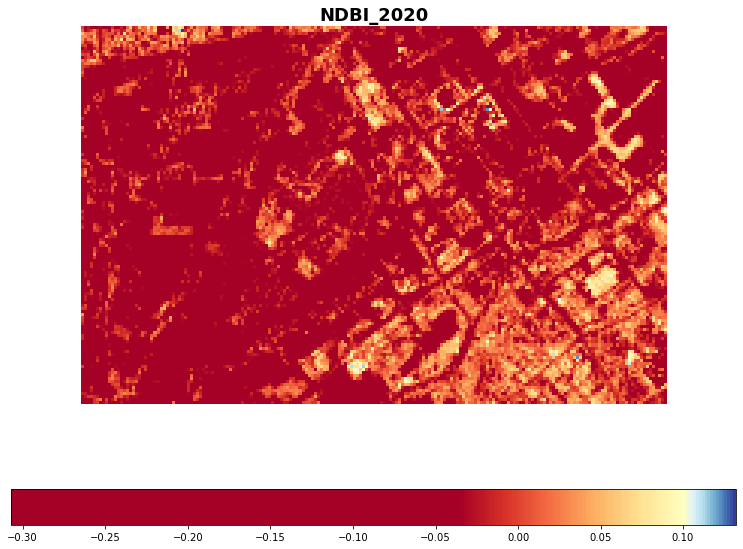

In [20]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(NDBI_2020)
max=np.nanmax(NDBI_2020)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(NDBI_2020, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('NDBI_2020', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

In [21]:
#NDVI
red_2020 = rasterio.open(r"C:\Deepali_pro\Covid_19_impact\urban_growth\result\AOI_2_based_res\landsat\res\2020\red_2020.tif")
red_2020_data = red_2021.read(1)
# NBR 
NDVI_2020 = (nir_2020_data.astype('float32') - red_2020_data.astype('float32'))/(nir_2020_data.astype('float32') + red_2020_data.astype('float32'))

c:\users\dell\.conda\envs\sar\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


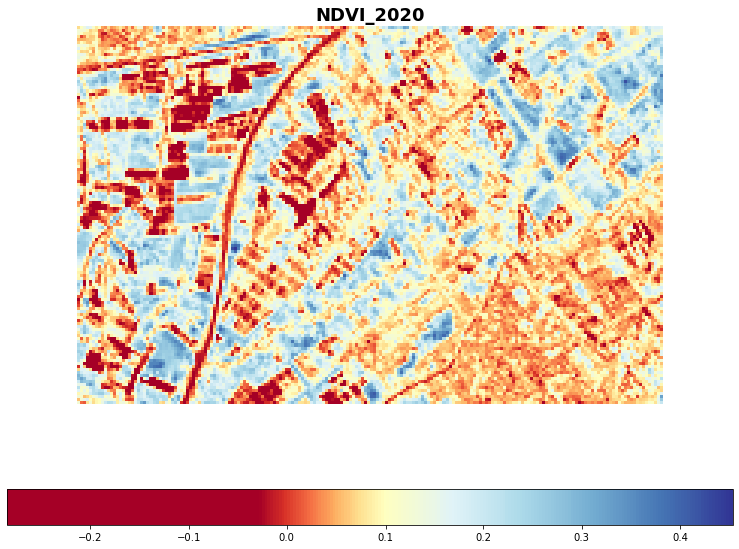

In [22]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(NDVI_2020)
max=np.nanmax(NDVI_2020)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(NDVI_2020, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('NDVI_2020', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

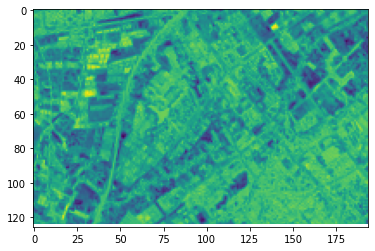

In [23]:

BU_2020 = NDBI_2020 - NDVI_2020
plt.imshow(BU_2020)

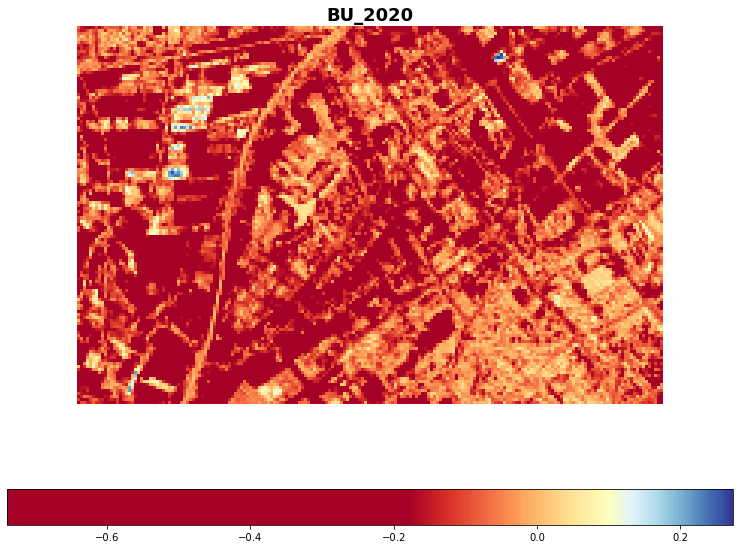

In [24]:
# cmaps['Diverging'] = [
#             'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#             'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

class MidpointNormalize(colors.Normalize):
        """
        Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
        e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
        Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
        """
        def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
            self.midpoint = midpoint
            colors.Normalize.__init__(self, vmin, vmax, clip)

        def __call__(self, value, clip=None):
            # I'm ignoring masked values and all kinds of edge cases to make a
            # simple example...
            x, y = [self.vmin, self.midpoint, self.vmax], [-1, 0.5, 1]
            return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

min=np.nanmin(BU_2020)
max=np.nanmax(BU_2020)
# print('min',min,'max',max)
mid=0.1
norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cmap = plt.cm.RdYlBu 
cax = ax.imshow(BU_2020, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))
ax.axis('off')
ax.set_title('BU_2020', fontsize=18, fontweight='bold')
cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)
#fig.savefig(r"C:\Deepali_pro\Covid_19_impact\Wildfire_california\landsat\res\RBR.png", dpi=200, bbox_inches='tight', pad_inches=0.7)